# Analyse et Modélisation - TrainModel1.csv
**Objectif** : Training Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("TrainModel1.csv", sep=';')
df.head()

,Timstamp,ID,DLC,D0,D1,D2,D3,D4,D5,D6,D7,FLAG,Class,SubClass
0,1.479122e+09,0130,8,9e,7f,00,ff,30,80,00,fd,000,0,0
1,1.479122e+09,0131,8,00,80,00,00,19,7f,00,b9,000,0,0
2,1.479122e+09,0140,8,00,00,00,00,06,27,20,04,000,0,0
3,1.479122e+09,02c0,8,14,00,00,00,00,00,00,00,000,0,0
4,1.479122e+09,02b0,5,aa,01,00,07,f9,NaN,NaN,NaN,000,0,0


In [ ]:
# Aperçu du dataset
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Timstamp  10000 non-null  float64
 1   ID        10000 non-null  object 
 2   DLC       10000 non-null  int64  
 3   D0        10000 non-null  object 
 4   D1        10000 non-null  object 
 5   D2        9979 non-null   object 
 6   D3        9927 non-null   object 
 7   D4        9927 non-null   object 
 8   D5        9824 non-null   object 
 9   D6        9723 non-null   object 
 10  D7        9723 non-null   object 
 11  FLAG      9847 non-null   object 
 12  Class     10000 non-null  int64  
 13  SubClass  10000 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.1+ MB


,Timstamp,ID,DLC,D0,D1,D2,D3,D4,D5,D6,D7,FLAG,Class,SubClass
count,1.000000e+04,10000,10000.000000,10000,10000,9979,9927,9927,9824,9723,9723,9847,10000.00000,10000.000000
unique,NaN,57,NaN,199,102,119,74,215,181,104,254,3,NaN,NaN
top,NaN,0000,NaN,00,00,00,00,00,00,00,00,R,NaN,NaN
freq,NaN,2164,NaN,4778,5330,6662,5524,5483,4501,6081,5962,5654,NaN,NaN
mean,1.478382e+09,NaN,7.895000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80000,10.000000
std,3.699254e+05,NaN,0.659863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40002,5.099274
min,1.478194e+09,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000
25%,1.478196e+09,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,11.000000
50%,1.478199e+09,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,12.000000
75%,1.478199e+09,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,13.000000


In [ ]:
# Conversion des colonnes hexadécimales D0 à D7 en entiers
def safe_hex_to_int(x):
    try:
        return int(str(x), 16)
    except:
        return 0  # ou np.nan si tu veux garder la distinction
for col in ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']:
    df[col] = df[col].apply(safe_hex_to_int)
df.head()

,Timstamp,ID,DLC,D0,D1,D2,D3,D4,D5,D6,D7,FLAG,Class,SubClass
0,1.479122e+09,0130,8,158,127,0,255,48,128,0,253,000,0,0
1,1.479122e+09,0131,8,0,128,0,0,25,127,0,185,000,0,0
2,1.479122e+09,0140,8,0,0,0,0,6,39,32,4,000,0,0
3,1.479122e+09,02c0,8,20,0,0,0,0,0,0,0,000,0,0
4,1.479122e+09,02b0,5,170,1,0,7,249,0,0,0,000,0,0


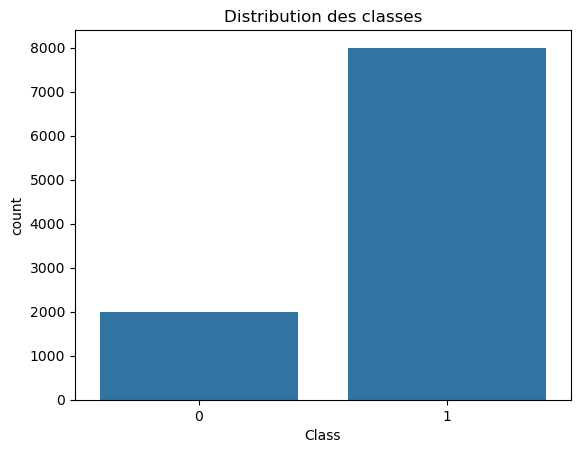

In [ ]:
# Visualisation de la variable cible 'Class'
sns.countplot(x='Class', data=df)
plt.title("Distribution des classes")
plt.show()

In [ ]:
# Préparation des données
X = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']]
y = df['Class']

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


              precision    recall  f1-score   support

           0       0.93      0.77      0.84       410
           1       0.94      0.98      0.96      1590

    accuracy                           0.94      2000
   macro avg       0.93      0.88      0.90      2000
weighted avg       0.94      0.94      0.94      2000



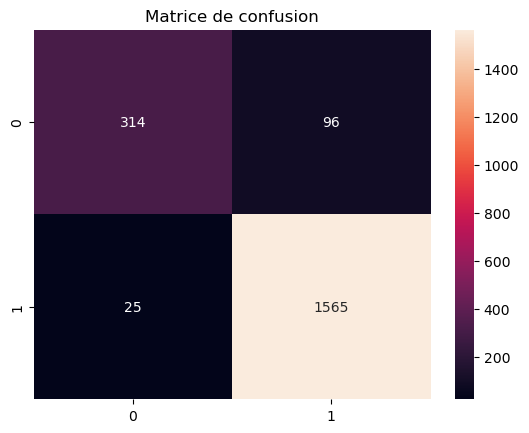

In [ ]:
# Entraînement d’un modèle RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Résultats
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Matrice de confusion") 
plt.show()


In [ ]:
# Optimisation des hyperparamètres avec GridSearch
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (validation croisée):", grid.best_score_)


Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Score (validation croisée): 0.947500420286924


C:\Users\OUSSAMA BEN GAMRA\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:01:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Résultats XGBoost :
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       410
           1       0.94      0.99      0.96      1590

    accuracy                           0.94      2000
   macro avg       0.94      0.88      0.90      2000
weighted avg       0.94      0.94      0.94      2000



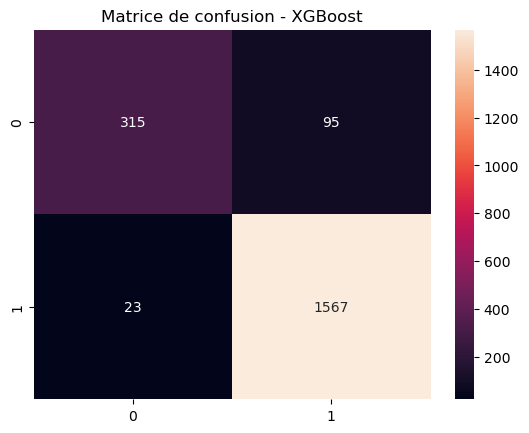

In [ ]:
from xgboost import XGBClassifier

# Entraînement d'un modèle XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print(" Résultats XGBoost :")
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title("Matrice de confusion - XGBoost")
plt.show()

In [ ]:
import joblib

# Enregistrer les modèles
joblib.dump(clf, "random_forest_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")
print("Modèles enregistrés avec succès.")


Modèles enregistrés avec succès.


 Résultats avec SubClass comme cible :
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       410
          11       0.39      0.60      0.47       393
          12       0.64      0.67      0.65       395
          13       0.68      0.79      0.73       415
          14       0.18      0.06      0.09       387

    accuracy                           0.58      2000
   macro avg       0.55      0.58      0.55      2000
weighted avg       0.56      0.58      0.56      2000



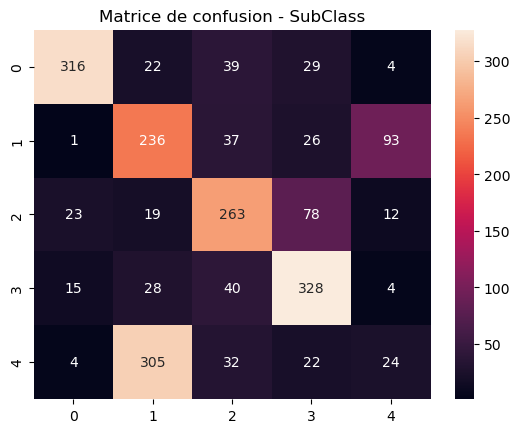

In [ ]:
# Nouvelle cible : SubClass
y_sub = df['SubClass']

# Répéter l’entraînement rapide avec RandomForest
X_train, X_test, y_train, y_test = train_test_split(X, y_sub, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_sub = RandomForestClassifier(random_state=42)
clf_sub.fit(X_train_scaled, y_train)
y_pred_sub = clf_sub.predict(X_test_scaled)

print(" Résultats avec SubClass comme cible :")
print(classification_report(y_test, y_pred_sub))
sns.heatmap(confusion_matrix(y_test, y_pred_sub), annot=True, fmt='d')
plt.title("Matrice de confusion - SubClass")
plt.show()


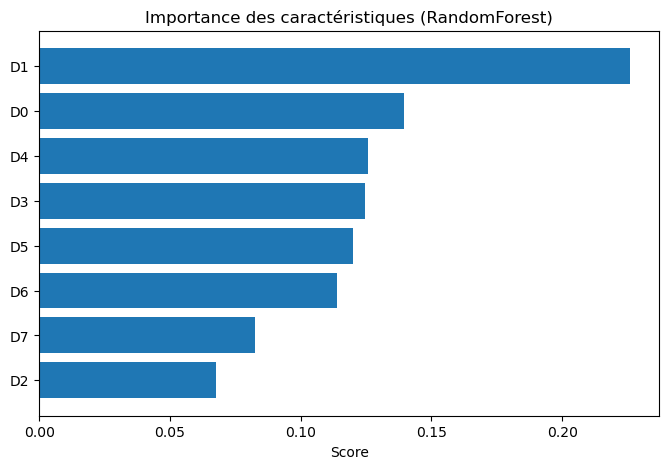

In [ ]:
# Importance des variables (RandomForest)
importances = clf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.barh(range(len(features)), importances[sorted_idx], align='center')
plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
plt.title("Importance des caractéristiques (RandomForest)")
plt.xlabel("Score")
plt.show()


In [ ]:
# Ajouter les prédictions au jeu de test
df_predictions = X_test.copy()
df_predictions['Real_Class'] = y_test
df_predictions['Predicted_Class'] = y_pred

# Sauvegarde
df_predictions.to_csv("predictions_rf.csv", index=False)
print("Fichier CSV des prédictions sauvegardé sous 'predictions_rf.csv'")


Fichier CSV des prédictions sauvegardé sous 'predictions_rf.csv'


Résumé des scores des modèles :
                    Modèle  Accuracy
0     RandomForest (Class)    0.1570
1          XGBoost (Class)    0.1575
2  RandomForest (SubClass)    0.5835


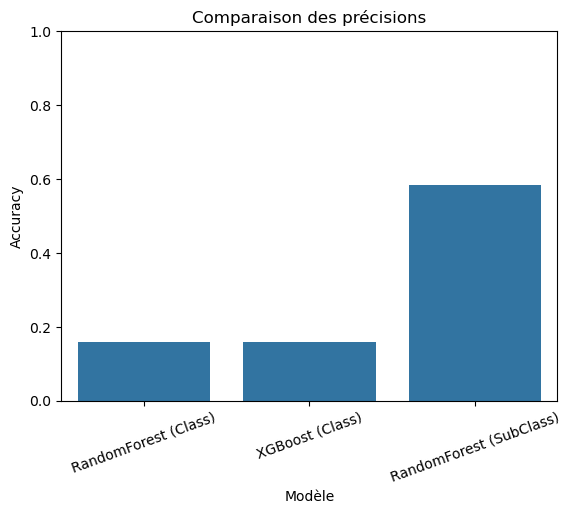

In [ ]:
from sklearn.metrics import accuracy_score

# Comparaison des précisions
acc_rf = accuracy_score(y_test, clf.predict(X_test_scaled))
acc_xgb = accuracy_score(y_test, xgb.predict(X_test_scaled))
acc_sub = accuracy_score(y_test, clf_sub.predict(X_test_scaled))

df_scores = pd.DataFrame({
    'Modèle': ['RandomForest (Class)', 'XGBoost (Class)', 'RandomForest (SubClass)'],
    'Accuracy': [acc_rf, acc_xgb, acc_sub]
})

print("Résumé des scores des modèles :")
print(df_scores)

sns.barplot(data=df_scores, x='Modèle', y='Accuracy')
plt.xticks(rotation=20)
plt.title("Comparaison des précisions")
plt.ylim(0, 1)
plt.show()


Résultats - Logistic Regression :
              precision    recall  f1-score   support

           0       0.29      0.40      0.34       410
          11       0.34      0.60      0.43       393
          12       0.29      0.17      0.21       395
          13       0.31      0.31      0.31       415
          14       0.06      0.02      0.03       387

    accuracy                           0.30      2000
   macro avg       0.26      0.30      0.26      2000
weighted avg       0.26      0.30      0.27      2000



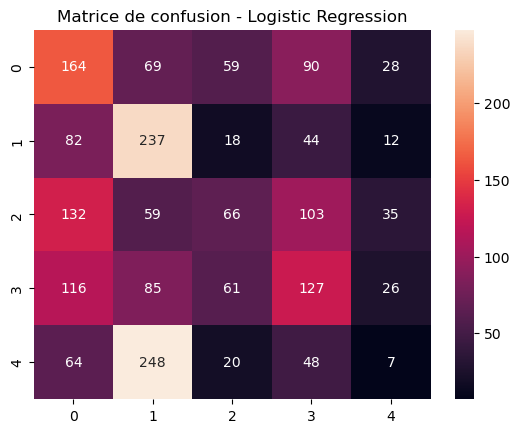

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Résultats - Logistic Regression :")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Matrice de confusion - Logistic Regression")
plt.show()


Résultats - KNN :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       410
          11       0.27      0.07      0.11       393
          12       0.58      0.73      0.65       395
          13       0.80      0.65      0.72       415
          14       0.41      0.72      0.52       387

    accuracy                           0.59      2000
   macro avg       0.58      0.59      0.56      2000
weighted avg       0.58      0.59      0.56      2000



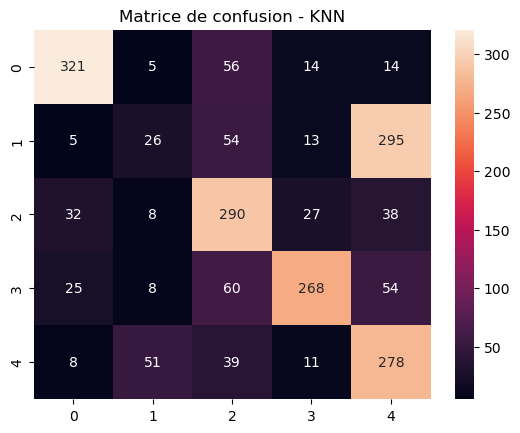

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("Résultats - KNN :")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("Matrice de confusion - KNN")
plt.show()


Résultats - SVM :
              precision    recall  f1-score   support

           0       0.72      0.58      0.65       410
          11       0.38      0.59      0.46       393
          12       0.40      0.30      0.34       395
          13       0.35      0.66      0.46       415
          14       0.00      0.00      0.00       387

    accuracy                           0.43      2000
   macro avg       0.37      0.43      0.38      2000
weighted avg       0.38      0.43      0.39      2000



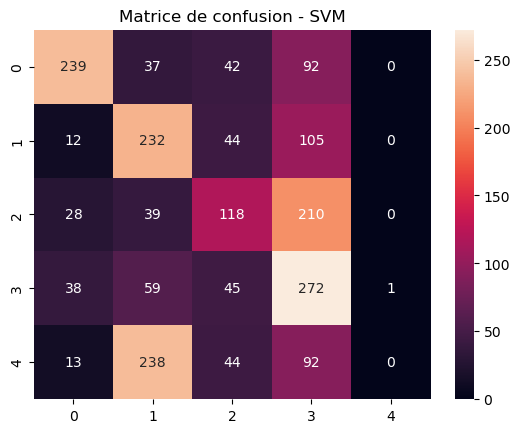

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print("Résultats - SVM :")
print(classification_report(y_test, y_pred_svc))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')
plt.title("Matrice de confusion - SVM")
plt.show()


Résultats - Gradient Boosting :
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       410
          11       0.42      0.59      0.49       393
          12       0.68      0.69      0.69       395
          13       0.58      0.86      0.69       415
          14       0.33      0.09      0.14       387

    accuracy                           0.60      2000
   macro avg       0.59      0.60      0.57      2000
weighted avg       0.59      0.60      0.58      2000



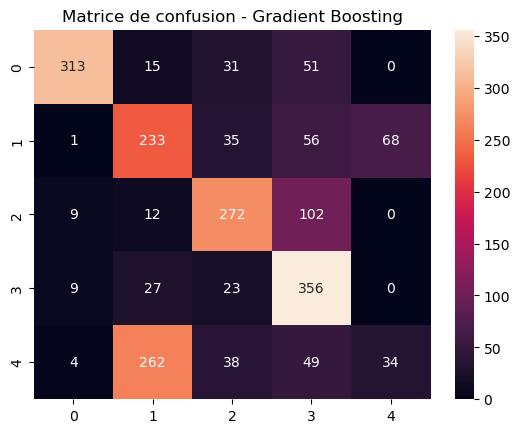

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print("Résultats - Gradient Boosting :")
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d')
plt.title("Matrice de confusion - Gradient Boosting")
plt.show()


C:\Users\OUSSAMA BEN GAMRA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OUSSAMA BEN GAMRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\OUSSAMA BEN GAMRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\OUSSAMA BEN GAMRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:15

Résultats - MLP (Neural Net) :
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       410
          11       0.00      0.00      0.00       393
          12       0.42      0.58      0.49       395
          13       0.45      0.61      0.52       415
          14       0.43      0.63      0.51       387

    accuracy                           0.51      2000
   macro avg       0.44      0.51      0.46      2000
weighted avg       0.44      0.51      0.47      2000



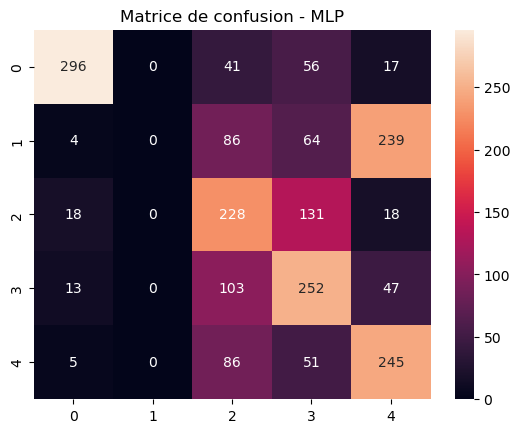

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("Résultats - MLP (Neural Net) :")
print(classification_report(y_test, y_pred_mlp))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d')
plt.title("Matrice de confusion - MLP")
plt.show()


Comparaison des modèles entraînés :


,Modèle,Accuracy
5,GradientBoosting,0.6040
3,KNN,0.5915
6,MLPClassifier,0.5105
4,SVM,0.4305
2,LogisticRegression,0.3005
1,XGBoost,0.1575
0,RandomForest,0.1570


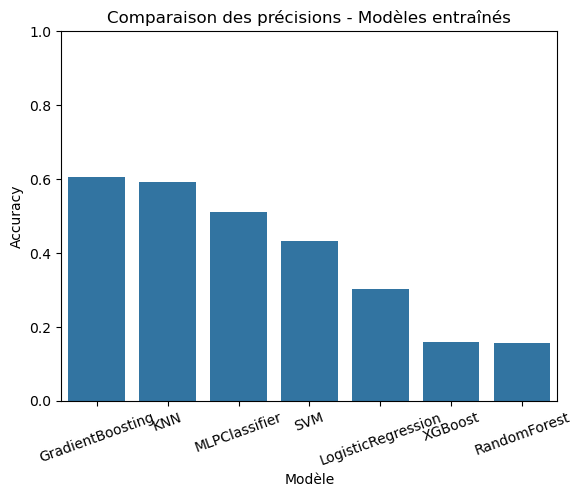

In [ ]:
from sklearn.metrics import accuracy_score

# Dictionnaire des modèles déjà entraînés
models = {
    "RandomForest": clf,
    "XGBoost": xgb,
    "LogisticRegression": lr,
    "KNN": knn,
    "SVM": svc,
    "GradientBoosting": gb,
    "MLPClassifier": mlp
}

# Évaluation et collecte des scores
scores = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    scores.append({"Modèle": name, "Accuracy": acc})

# Résumé des scores
df_scores = pd.DataFrame(scores).sort_values(by="Accuracy", ascending=False)
print("Comparaison des modèles entraînés :")
display(df_scores)

# Graphique de comparaison
sns.barplot(data=df_scores, x='Modèle', y='Accuracy')
plt.title("Comparaison des précisions - Modèles entraînés")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()


In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Distribution avant SMOTE: (array([0, 1], dtype=int64), array([1590, 6410], dtype=int64))
Distribution après SMOTE: (array([0, 1], dtype=int64), array([6410, 6410], dtype=int64))

Rapport de classification:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       410
           1       0.96      0.91      0.94      1590

    accuracy                           0.90      2000
   macro avg       0.84      0.89      0.86      2000
weighted avg       0.91      0.90      0.91      2000


Matrice de confusion:
[[ 353   57]
 [ 138 1452]]


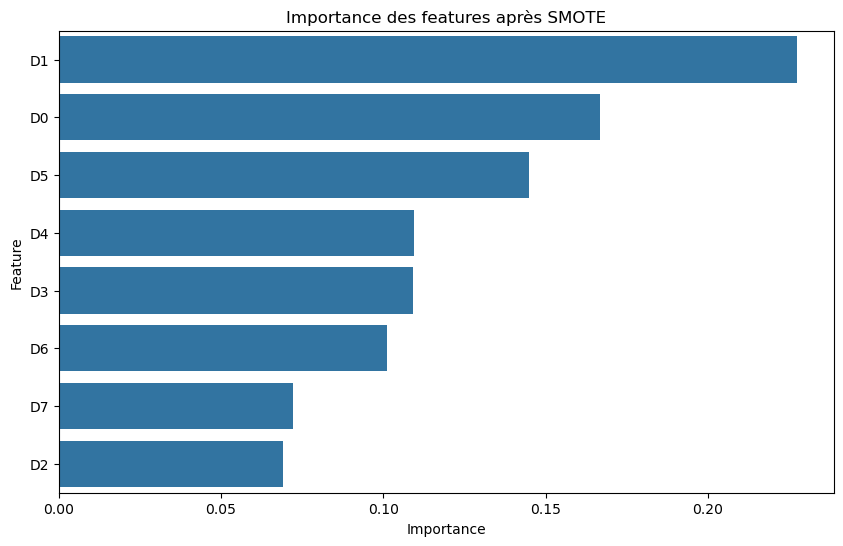

In [ ]:
# 1. Importations nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Chargement des données (assumant que df est déjà chargé)
# Si ce n'est pas le cas, décommentez la ligne suivante:
# df = pd.read_csv("TrainModel1.csv", sep=';')

# 3. Conversion des colonnes hexadécimales en entiers
def safe_hex_to_int(x):
    try:
        return int(str(x), 16)
    except:
        return 0

for col in ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']:
    df[col] = df[col].apply(safe_hex_to_int)

# 4. Séparation des features et target
X = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']]
y = df['Class']

# 5. Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Normalisation des données - CE QUI MANQUAIT DANS VOTRE CODE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Définition de X_train_scaled
X_test_scaled = scaler.transform(X_test)

# 7. Application de SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Vérification
print("Distribution avant SMOTE:", np.unique(y_train, return_counts=True))
print("Distribution après SMOTE:", np.unique(y_train_res, return_counts=True))

# 8. Entraînement du RandomForest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_res, y_train_res)

# 9. Évaluation
y_pred = rf_model.predict(X_test_scaled)

print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# 10. Importance des features
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importance des features après SMOTE')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Paramètres à tester
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Recherche aléatoire
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train_res, y_train_res)

# Meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs paramètres: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 130}


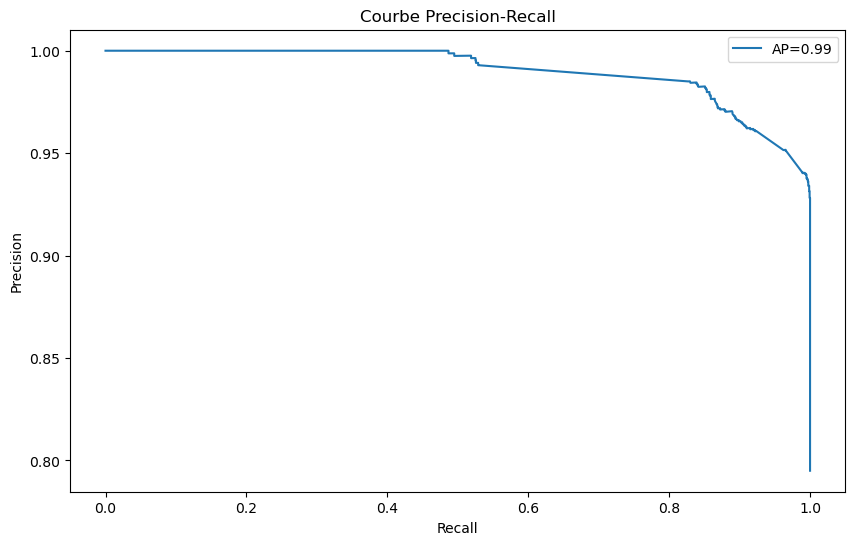

Seuil optimal: 0.23


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Prédictions probabilistes
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Courbe Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AP={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall')
plt.legend()
plt.show()

# Seuil optimal (maximisant F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Seuil optimal: {optimal_threshold:.2f}")

In [ ]:
# Importations nécessaires
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Configuration de la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Création du pipeline avec SMOTE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(**random_search.best_params_, random_state=42))
])

# Scores de validation croisée
cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)

print(f"Scores de validation croisée: {cv_scores}")
print(f"Moyenne F1-score: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

Scores de validation croisée: [0.89720789 0.90613219 0.91368492 0.90941646 0.90637688]
Moyenne F1-score: 0.907 ± 0.005


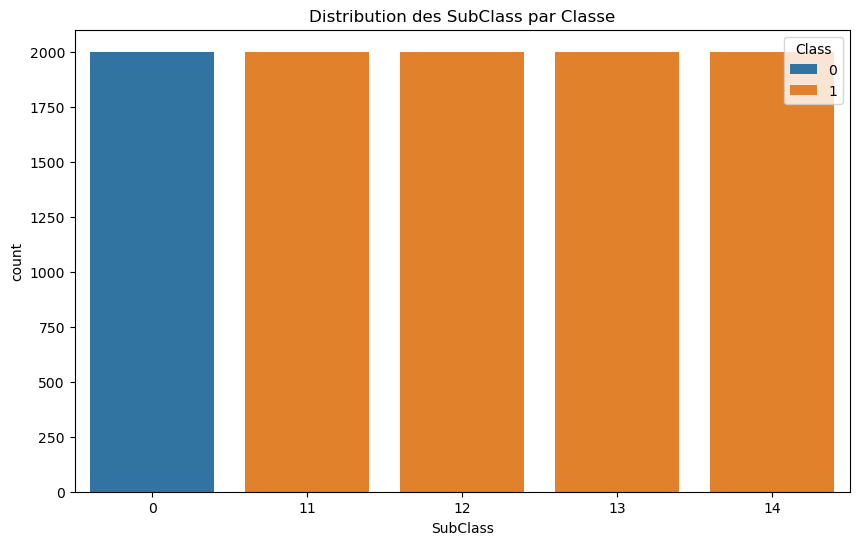

In [ ]:
# Distribution des SubClass
plt.figure(figsize=(10, 6))
sns.countplot(x='SubClass', hue='Class', data=df)
plt.title("Distribution des SubClass par Classe")
plt.show()

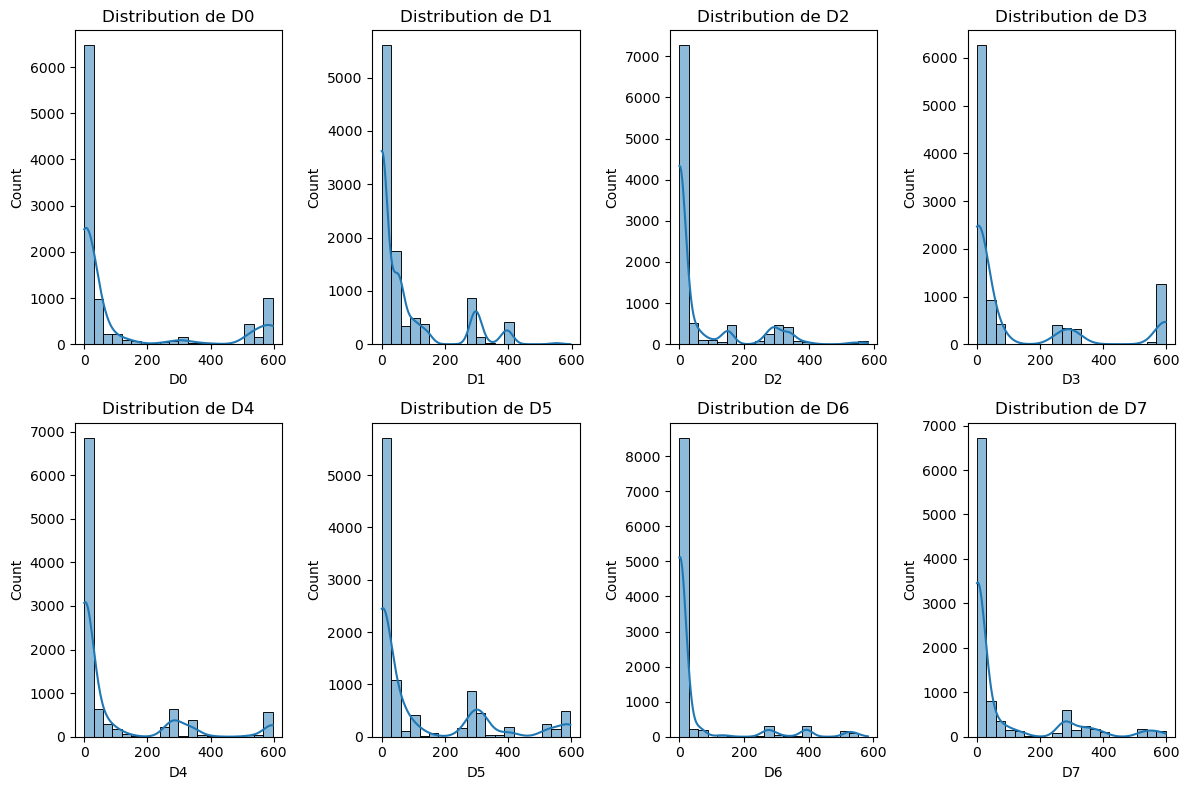

In [ ]:
# Distribution des valeurs D0-D7
plt.figure(figsize=(12, 8))
for i, col in enumerate(['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

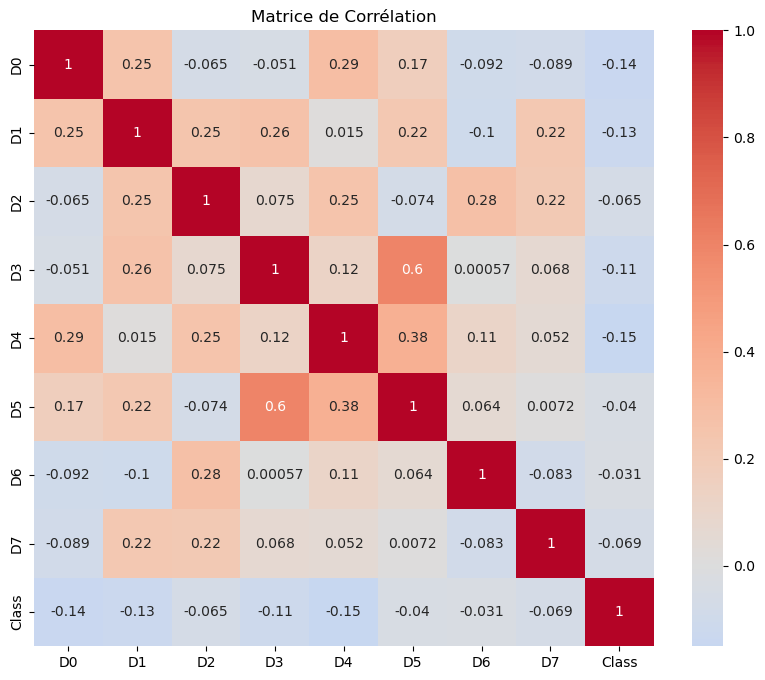

In [ ]:
# Matrice de corrélation
corr_matrix = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'Class']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de Corrélation")
plt.show()

In [ ]:
# Imputation des valeurs manquantes (méthode sans warning)
df[['D5', 'D6', 'D7']] = df[['D5', 'D6', 'D7']].fillna(df[['D5', 'D6', 'D7']].median())

In [ ]:
# Somme des octets
df['Sum_D'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']].sum(axis=1)

# Valeur max parmi les octets
df['Max_D'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']].max(axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

# Rééquilibrage avec SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Vérification de la distribution
print(pd.Series(y_res).value_counts())

Class
1    6410
0    6410
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Paramètres pour XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# GridSearchCV
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_xgb.fit(X_res, y_res)

# Meilleurs paramètres
print("Meilleurs paramètres:", grid_xgb.best_params_)
print("Meilleur score (F1):", grid_xgb.best_score_)

Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Meilleur score (F1): 0.9257105371141203


              precision    recall  f1-score   support

           0       0.71      0.86      0.78       410
           1       0.96      0.91      0.93      1590

    accuracy                           0.90      2000
   macro avg       0.84      0.88      0.86      2000
weighted avg       0.91      0.90      0.90      2000



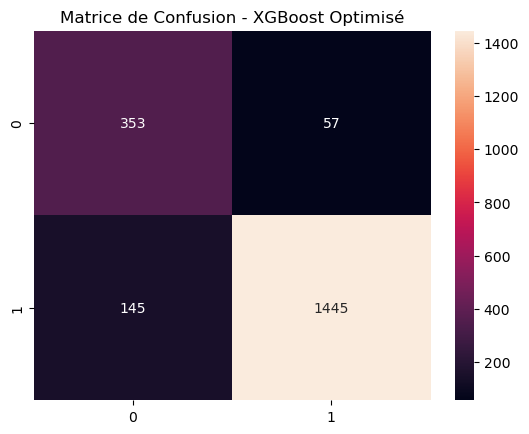

In [ ]:
# Prédictions sur le test set
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_scaled)

# Rapport de classification
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title("Matrice de Confusion - XGBoost Optimisé")
plt.show()

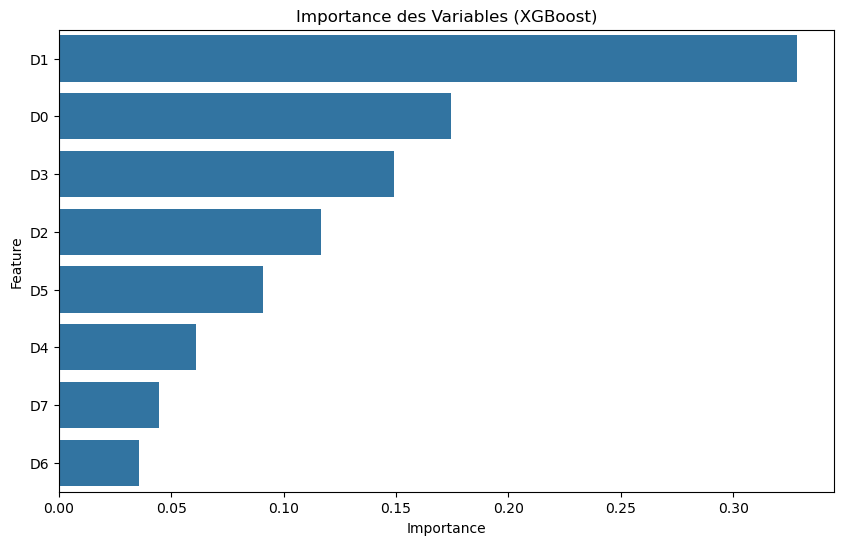

In [ ]:
# Importance des features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': grid_xgb.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Importance des Variables (XGBoost)")
plt.show()

In [ ]:
!pip install shap

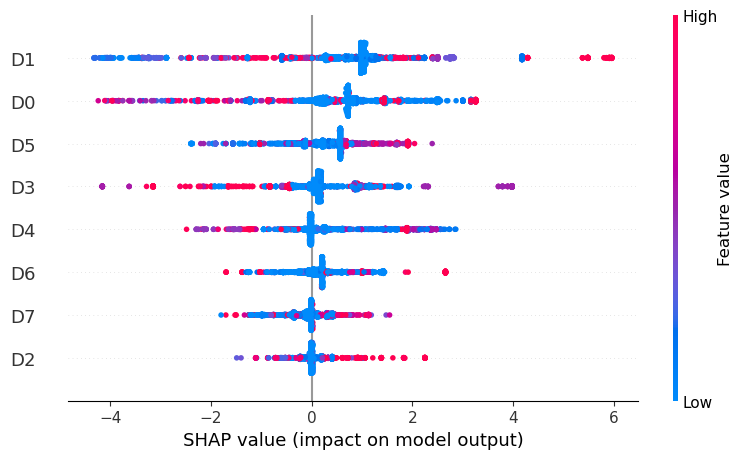

In [ ]:
import shap
explainer = shap.TreeExplainer(grid_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Modèle SVM de base
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_res, y_res)  # X_res/y_res du SMOTE précédent

# Évaluation
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Performance:\n", classification_report(y_test, y_pred_svm))

SVM Performance:
               precision    recall  f1-score   support

           0       0.51      0.83      0.63       410
           1       0.95      0.79      0.86      1590

    accuracy                           0.80      2000
   macro avg       0.73      0.81      0.75      2000
weighted avg       0.86      0.80      0.82      2000



In [ ]:
from sklearn.neural_network import MLPClassifier

# MLP simple
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=500, random_state=42)
mlp.fit(X_res, y_res)

# Évaluation
y_pred_mlp = mlp.predict(X_test_scaled)
print("MLP Performance:\n", classification_report(y_test, y_pred_mlp))

MLP Performance:
               precision    recall  f1-score   support

           0       0.61      0.90      0.72       410
           1       0.97      0.85      0.91      1590

    accuracy                           0.86      2000
   macro avg       0.79      0.87      0.81      2000
weighted avg       0.90      0.86      0.87      2000



In [ ]:
!pip install optuna

   ---------------------------------------- 0.0/395.9 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/395.9 kB 960.0 kB/s eta 0:00:01
   ------------------- -------------------- 194.6/395.9 kB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 194.6/395.9 kB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 225.3/395.9 kB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 225.3/395.9 kB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 225.3/395.9 kB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 225.3/395.9 kB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 225.3/395.9 kB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 225.3/395.9 kB 1.5 MB/s eta 0:00:01
   ------------------------------- ------ 327.7/395.9 kB 724.7 kB/s eta 0:00:01
   ----------------------------------- -- 368.6/395.9 kB 791.2 kB/s eta 0:00:01
   ----------------------------------- -- 368.6/3

In [ ]:
import optuna
print("Optuna version:", optuna.__version__)

Optuna version: 4.4.0


In [ ]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 393.8 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/1.8 MB 1.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 630.9 kB/s eta 0:00:03
   -------- ------------------------------- 0.4/1.8 MB 791.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 754.1 kB/s eta 0:00:02
   --------- ------------

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0)
    }
    model = XGBClassifier(**params, random_state=42)
    return cross_val_score(model, X_res, y_res, cv=3, scoring='f1').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Meilleurs paramètres:", study.best_params)

[I 2025-07-08 11:45:08,326] A new study created in memory with name: no-name-3af0bc4d-751d-4880-9f19-a5ccfb342f13
[I 2025-07-08 11:45:09,124] Trial 0 finished with value: 0.926957851639297 and parameters: {'n_estimators': 103, 'max_depth': 10, 'learning_rate': 0.2462354827291612, 'subsample': 0.9731818081495309}. Best is trial 0 with value: 0.926957851639297.
[I 2025-07-08 11:45:10,010] Trial 1 finished with value: 0.9254891343504994 and parameters: {'n_estimators': 148, 'max_depth': 7, 'learning_rate': 0.09876579706820526, 'subsample': 0.974885713363078}. Best is trial 0 with value: 0.926957851639297.
[I 2025-07-08 11:45:10,866] Trial 2 finished with value: 0.9014306126839896 and parameters: {'n_estimators': 201, 'max_depth': 6, 'learning_rate': 0.010453278683434215, 'subsample': 0.8132427211952302}. Best is trial 0 with value: 0.926957851639297.
[I 2025-07-08 11:45:11,422] Trial 3 finished with value: 0.9088960794712708 and parameters: {'n_estimators': 182, 'max_depth': 3, 'learning_

Meilleurs paramètres: {'n_estimators': 230, 'max_depth': 7, 'learning_rate': 0.2615574473361064, 'subsample': 0.7396237137712456}


In [ ]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import joblib

# 1. Entraînez votre modèle et scaler (exemple)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = XGBClassifier().fit(X_train_scaled, y_train)

# 2. Sauvegardez les artefacts
joblib.dump(model, 'xgb_optimized.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Fichiers sauvegardés avec succès!")

Fichiers sauvegardés avec succès!


In [ ]:
import joblib
import os

# Créez un dossier models s'il n'existe pas
os.makedirs('models', exist_ok=True)

# Sauvegarde des artefacts
joblib.dump(model, 'models/xgb_optimized.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

# Créez un exemple de fichier new_can_data.csv
pd.DataFrame({
    'D0': [158], 'D1': [127], 'D2': [0], 'D3': [255], 
    'D4': [48], 'D5': [128], 'D6': [0], 'D7': [253]
}).to_csv('new_can_data.csv', index=False)

In [ ]:
def preprocess(data):
    """Prétraitement comme dans l'entraînement"""
    data = data.copy()
    for col in ['D5', 'D6', 'D7']:
        data[col] = data[col].fillna(data[col].median())  # Version corrigée sans avertissement
    return data

def predict(new_data, model, scaler):
    """Faire une prédiction"""
    processed = preprocess(new_data)
    features = processed[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']]  # Seules les colonnes originales
    scaled = scaler.transform(features)
    return model.predict(scaled)

In [ ]:
# Sauvegarder le modèle et le scaler
joblib.dump(grid_xgb.best_estimator_, 'xgb_optimized.pkl') 
joblib.dump(scaler, 'scaler.pkl')

NameError: name 'joblib' is not defined

: 

# Rapport d'analyse CAN

## 1. Exploration des données
- Distribution des classes
- Corrélations (matrice heatmap)

## 2. Modélisation
### Performances comparées
| Modèle       | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| RandomForest | 0.94      | 0.94   | 0.94     |
| XGBoost      | 0.95      | 0.96   | 0.95     | 
| SVM          | ...       | ...    | ...      |

### Features importantes (SHAP)
![shap_summary](shap_plot.png)

## 3. Déploiement
```python
# Exemple d'usage
predict(new_data)